In [1]:
import pandas as pd
import numpy as np

import matplotlib as plt
import matplotlib.pyplot as plt

In [2]:
COLUMNS = ['symbol', 'date', 'time', 'open', 'high', 'low', 'close', 'volume',
           'open_interest', 'turn_over', 'last', 'average', 'settle',
           'pre_close', 'pre_settle', 'pre_open_interest',
           'ask1_price', 'ask1_volume', 'bid1_price', 'bid1_volume']

In [3]:
df = pd.read_csv('./data/Ticker.MA2209.ZCE.csv')
df.columns = COLUMNS
df.head()

,symbol,date,time,open,high,low,close,volume,open_interest,turn_over,last,average,settle,pre_close,pre_settle,pre_open_interest,ask1_price,ask1_volume,bid1_price,bid1_volume
0,MA2209.ZCE,20220712,22:26:37.000,2311.0,2336.0,2296.0,2328.0,574569,1025153.0,0.0,2328.0,2316.0,0.0,2324.0,2351.0,1185293.0,2328.0,232,2327.0,166
1,MA2209.ZCE,20220712,22:26:38.000,2311.0,2336.0,2296.0,2327.0,574579,1025147.0,0.0,2327.0,2316.0,0.0,2324.0,2351.0,1185293.0,2328.0,243,2327.0,161
2,MA2209.ZCE,20220712,22:26:38.000,2311.0,2336.0,2296.0,2327.0,574587,1025142.0,0.0,2327.0,2316.0,0.0,2324.0,2351.0,1185293.0,2328.0,239,2327.0,160
3,MA2209.ZCE,20220712,22:26:39.000,2311.0,2336.0,2296.0,2328.0,574628,1025147.0,0.0,2328.0,2316.0,0.0,2324.0,2351.0,1185293.0,2328.0,200,2327.0,190
4,MA2209.ZCE,20220712,22:26:39.000,2311.0,2336.0,2296.0,2328.0,574934,1025155.0,0.0,2328.0,2316.0,0.0,2324.0,2351.0,1185293.0,2328.0,104,2327.0,58


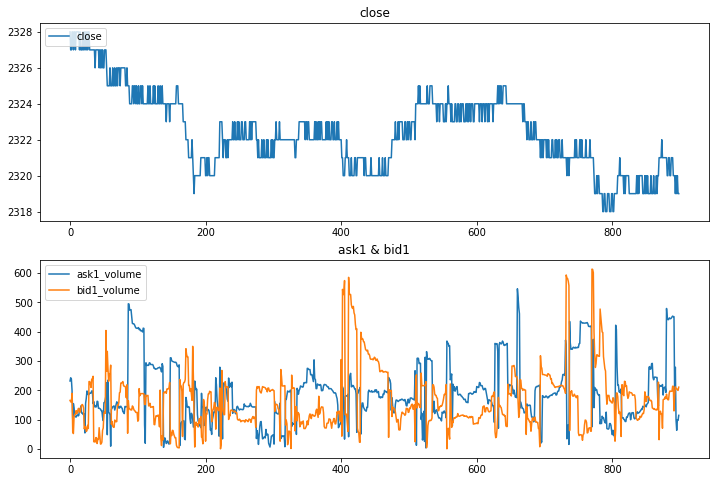

In [4]:
# 整个图的大小
plt.figure(figsize=(12, 8))

# 将整个图分成 4*4 个格子，坐标从 0,0 算起，合并2行4列
top = plt.subplot2grid((4, 4), (0, 0), rowspan=2, colspan=4)
top.plot(df['close'], label='close')
plt.title('close')
plt.legend(loc=2)

# 将整个图分成 4*4 个格子，坐标从 2,0 算起，合并2行4列
buttom = plt.subplot2grid((4, 4), (2, 0), rowspan=2, colspan=4)
# buttom.plot(df['volume'], label='volume')
buttom.plot(df['ask1_volume'], label='ask1_volume')
buttom.plot(df['bid1_volume'], label='bid1_volume')
plt.title('ask1 & bid1')
plt.legend(loc=2)

# 子图之间的水平间距
plt.subplots_adjust(hspace=0.5)


In [5]:
# 制作特征集 x, 所有行，指定列
raw_x = df[['open', 'high', 'low', 'close', 'volume', 
            'average', 'ask1_price', 'ask1_volume', 'bid1_price', 'bid1_volume']]
raw_x.head()

,open,high,low,close,volume,average,ask1_price,ask1_volume,bid1_price,bid1_volume
0,2311.0,2336.0,2296.0,2328.0,574569,2316.0,2328.0,232,2327.0,166
1,2311.0,2336.0,2296.0,2327.0,574579,2316.0,2328.0,243,2327.0,161
2,2311.0,2336.0,2296.0,2327.0,574587,2316.0,2328.0,239,2327.0,160
3,2311.0,2336.0,2296.0,2328.0,574628,2316.0,2328.0,200,2327.0,190
4,2311.0,2336.0,2296.0,2328.0,574934,2316.0,2328.0,104,2327.0,58


In [6]:
def concat_diff(d, p):
    p_ = '_' + str(p)
    df_ = d.diff(periods=p)
    df_.columns = [column + p_ for column in d.columns]
#     print(df_.columns)
    df_ = pd.concat([d, 
                     df_[['close' + p_, 
                          'volume' + p_, 
                          'ask1_price' + p_,
                          'ask1_volume' + p_,
                          'bid1_price' + p_,
                          'bid1_volume' + p_]]], axis=1)
    return df_

In [7]:
# 制作特征集 x, 添加 前1, 3, 5秒的 close, ask1_volume 增量， bid1_volume 增量
data_x = concat_diff(raw_x, 2)
data_x = concat_diff(data_x, 6)
data_x = concat_diff(data_x, 10)
data_x = data_x[10:]
data_x.head()

,open,high,low,close,volume,average,ask1_price,ask1_volume,bid1_price,bid1_volume,...,ask1_price_6,ask1_volume_6,bid1_price_6,bid1_volume_6,close_10,volume_10,ask1_price_10,ask1_volume_10,bid1_price_10,bid1_volume_10
10,2311.0,2336.0,2296.0,2328.0,575025,2316.0,2328.0,115,2327.0,121,...,0.0,11.0,0.0,63.0,0.0,456.0,0.0,-117.0,0.0,-45.0
11,2311.0,2336.0,2296.0,2328.0,575027,2316.0,2328.0,117,2327.0,125,...,0.0,-38.0,0.0,72.0,1.0,448.0,0.0,-126.0,0.0,-36.0
12,2311.0,2336.0,2296.0,2328.0,575033,2316.0,2328.0,113,2327.0,137,...,0.0,-28.0,0.0,26.0,1.0,446.0,0.0,-126.0,0.0,-23.0
13,2311.0,2336.0,2296.0,2328.0,575052,2316.0,2328.0,115,2327.0,139,...,0.0,3.0,0.0,21.0,0.0,424.0,0.0,-85.0,0.0,-51.0
14,2311.0,2336.0,2296.0,2327.0,575058,2316.0,2328.0,136,2327.0,126,...,0.0,26.0,0.0,8.0,-1.0,124.0,0.0,32.0,0.0,68.0


In [8]:
def display_diff(d, p):
    p_ = '_' + str(p)
    # 整个图的大小
    plt.figure(figsize=(12, 8))

    # 将整个图分成 6*4 个格子，坐标从 0,0 算起，合并2行4列
    top = plt.subplot2grid((6, 4), (0, 0), rowspan=2, colspan=4)
    top.plot(d['close' + p_], label='close' + p_)
    plt.title('close' + p_)
    plt.legend(loc=2)

    # 将整个图分成 6*4 个格子，坐标从 2,0 算起，合并2行4列
    buttom = plt.subplot2grid((6, 4), (2, 0), rowspan=2, colspan=4)
    # buttom.plot(df['volume'], label='volume')
    buttom.plot(d['ask1_volume' + p_], label='ask1_volume' + p_)
    buttom.plot(d['bid1_volume' + p_], label='bid1_volume' + p_)
    plt.title('ask1 & bid1')
    plt.legend(loc=2)

    # 子图之间的水平间距
    plt.subplots_adjust(hspace=0.8)


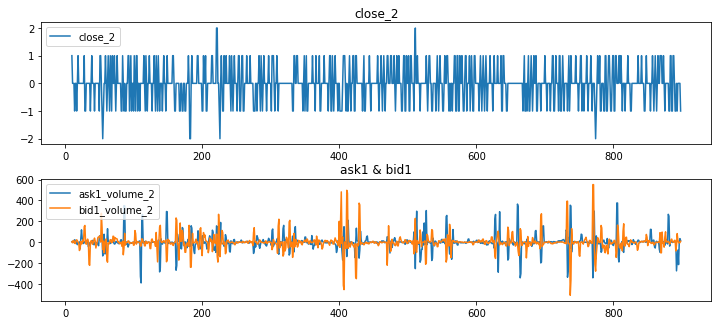

In [9]:
display_diff(data_x, 2)

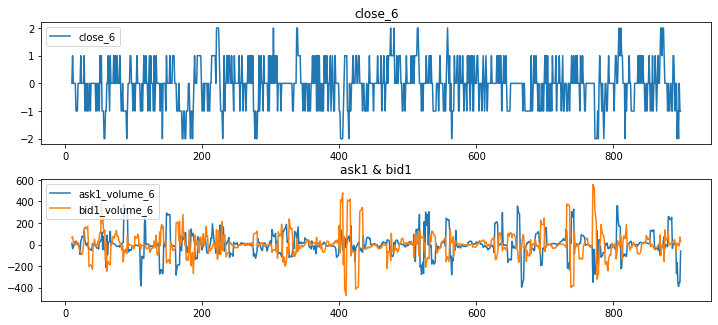

In [10]:
display_diff(data_x, 6)

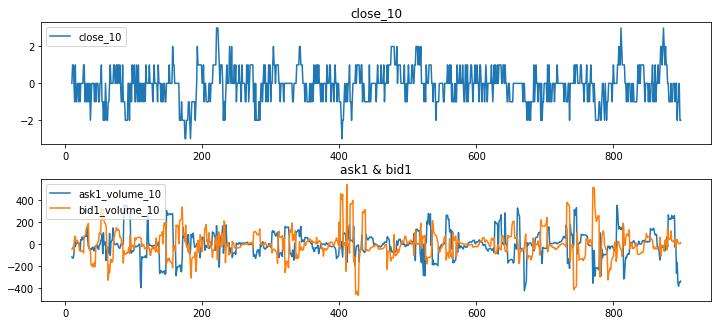

In [11]:
display_diff(data_x, 10)

In [12]:
# 制作标注集 y -- 如果 close_10 > 0 则为1，如果 close_10 <= 0 则为0
data_y = data_x['close_10'].apply(lambda x: 1 if x > 0 else 0)
data_y.columns = ['up_10']
data_y.head()

10    0
11    1
12    1
13    0
14    0
Name: close_10, dtype: int64

In [13]:
# 划分训练集和测试集
print(data_x.shape, data_y.shape)
train_x = data_x[:3000]
train_y = data_y[:3000]
print(train_x.shape, train_y.shape)
test_x = data_x[3000:]
test_y = data_y[3000:]
print(test_x.shape, test_y.shape)


(889, 28) (889,)
(889, 28) (889,)
(0, 28) (0,)


In [14]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 10 to 898
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   open            889 non-null    float64
 1   high            889 non-null    float64
 2   low             889 non-null    float64
 3   close           889 non-null    float64
 4   volume          889 non-null    int64  
 5   average         889 non-null    float64
 6   ask1_price      889 non-null    float64
 7   ask1_volume     889 non-null    int64  
 8   bid1_price      889 non-null    float64
 9   bid1_volume     889 non-null    int64  
 10  close_2         889 non-null    float64
 11  volume_2        889 non-null    float64
 12  ask1_price_2    889 non-null    float64
 13  ask1_volume_2   889 non-null    float64
 14  bid1_price_2    889 non-null    float64
 15  bid1_volume_2   889 non-null    float64
 16  close_6         889 non-null    float64
 17  volume_6        889 non-null    fl

In [15]:
# 取10行来测试数据存取移动, 要用loc函数
ddf = df.loc[0:10,['time','close','ask1_price','ask1_volume']].copy()
ddf.shape

(11, 4)

In [16]:
ddf.head(6)

,time,close,ask1_price,ask1_volume
0,22:26:37.000,2328.0,2328.0,232
1,22:26:38.000,2327.0,2328.0,243
2,22:26:38.000,2327.0,2328.0,239
3,22:26:39.000,2328.0,2328.0,200
4,22:26:39.000,2328.0,2328.0,104
5,22:26:40.000,2327.0,2328.0,155


In [17]:
# 将上一个记录的申卖量下移一行
ddf1 = ddf[['ask1_volume']].shift()
ddf1.columns = ['ask1_volume_1']
print(ddf1.shape)
# 将上一个记录的申卖量下移一行
ddf2 = ddf[['ask1_volume']].shift(2)
ddf2.columns = ['ask1_volume_2']
print(ddf2.shape)
# 合并到ddf里
ddf_ = pd.concat([ddf, ddf1, ddf2], axis=1)
ddf_.head(6)

(11, 1)
(11, 1)


,time,close,ask1_price,ask1_volume,ask1_volume_1,ask1_volume_2
0,22:26:37.000,2328.0,2328.0,232,NaN,NaN
1,22:26:38.000,2327.0,2328.0,243,232.0,NaN
2,22:26:38.000,2327.0,2328.0,239,243.0,232.0
3,22:26:39.000,2328.0,2328.0,200,239.0,243.0
4,22:26:39.000,2328.0,2328.0,104,200.0,239.0
5,22:26:40.000,2327.0,2328.0,155,104.0,200.0


In [18]:
# 将前一行的列下移一行
def shift_data(df, columns, num, down=True):
    """
    df 数据集
    columns 列名列表
    num 一共处理多少行
    down 表示向下移动
    """
    d = [df]
    for n in range(1, num + 1):
        # 向上向下的符号
        sign = 1 if down else -1
        # 移动后新的列名后缀，b1 表示前1行的列，a1 表示后1行的列
        postfix = '_' + ('b' if down else 'a') + str(n)
        df1 = df[columns].shift(n * sign)
        df1.columns = [c + postfix for c in columns]
        d.append(df1)
    return pd.concat(d, axis=1)

def shift_down(df, columns, num):
    return shift_data(df, columns, num)

def shift_up(df, columns, num):
    return shift_data(df, columns, num, down=False)

In [19]:
# 将前一行的列下移一行, 一共处理3次
# ask1_price_1 表示前一秒的价格，ask1_volume_1表示前一秒的量
ddf_ = shift_down(ddf, ['ask1_price', 'ask1_volume'], 3)
ddf_.head(6)

,time,close,ask1_price,ask1_volume,ask1_price_b1,ask1_volume_b1,ask1_price_b2,ask1_volume_b2,ask1_price_b3,ask1_volume_b3
0,22:26:37.000,2328.0,2328.0,232,NaN,NaN,NaN,NaN,NaN,NaN
1,22:26:38.000,2327.0,2328.0,243,2328.0,232.0,NaN,NaN,NaN,NaN
2,22:26:38.000,2327.0,2328.0,239,2328.0,243.0,2328.0,232.0,NaN,NaN
3,22:26:39.000,2328.0,2328.0,200,2328.0,239.0,2328.0,243.0,2328.0,232.0
4,22:26:39.000,2328.0,2328.0,104,2328.0,200.0,2328.0,239.0,2328.0,243.0
5,22:26:40.000,2327.0,2328.0,155,2328.0,104.0,2328.0,200.0,2328.0,239.0


In [20]:
# 将后n秒的列合并到当前行
# ask1_volume_1 表示一秒后的量，ask1_volume_2表示2秒后的量
ddf_1 = shift_up(ddf, ['ask1_volume'], 3)
ddf_1.tail(6)

,time,close,ask1_price,ask1_volume,ask1_volume_a1,ask1_volume_a2,ask1_volume_a3
5,22:26:40.000,2327.0,2328.0,155,141.0,112.0,110.0
6,22:26:40.000,2328.0,2328.0,141,112.0,110.0,109.0
7,22:26:41.000,2328.0,2328.0,112,110.0,109.0,115.0
8,22:26:41.000,2327.0,2328.0,110,109.0,115.0,NaN
9,22:26:42.000,2328.0,2328.0,109,115.0,NaN,NaN
10,22:26:42.000,2328.0,2328.0,115,NaN,NaN,NaN


In [21]:
print(ddf.shape, ddf_1.shape)

(11, 4) (11, 7)
